# IMPORTING DEPENDENCIES

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import expon, kstest
import numpy as np

In [3]:
df = pd.read_csv('..\data\data.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_14900\1175757797.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\data\data.csv')


# Data Cleaning and Preprocessing

In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

### Dealing with missing values

In [6]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

### Checking for duplicated

In [7]:
df.duplicated().sum()

0

### Type casting Features

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [9]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'], dayfirst=True, errors='coerce') #convert to unix

C:\Users\HP\AppData\Local\Temp\ipykernel_14900\721739896.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Effective To Date'] = pd.to_datetime(df['Effective To Date'], dayfirst=True, errors='coerce') #convert to unix


### Outlier Dtection

In [10]:
num_col = df.select_dtypes(include = ['int64', 'float64']).columns
num_col

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

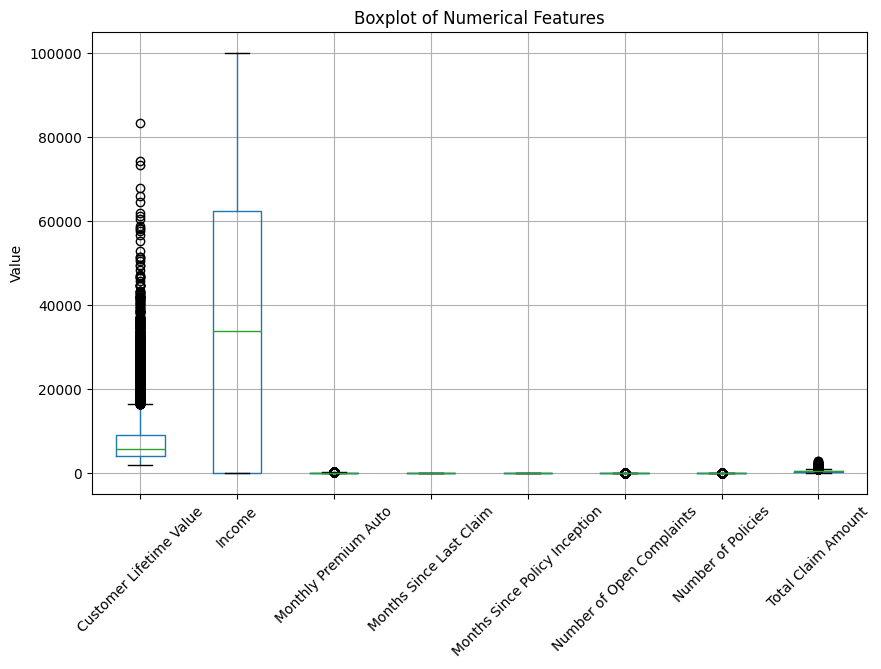

In [11]:
plt.figure(figsize=(10, 6))
df[num_col].boxplot()
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.show()

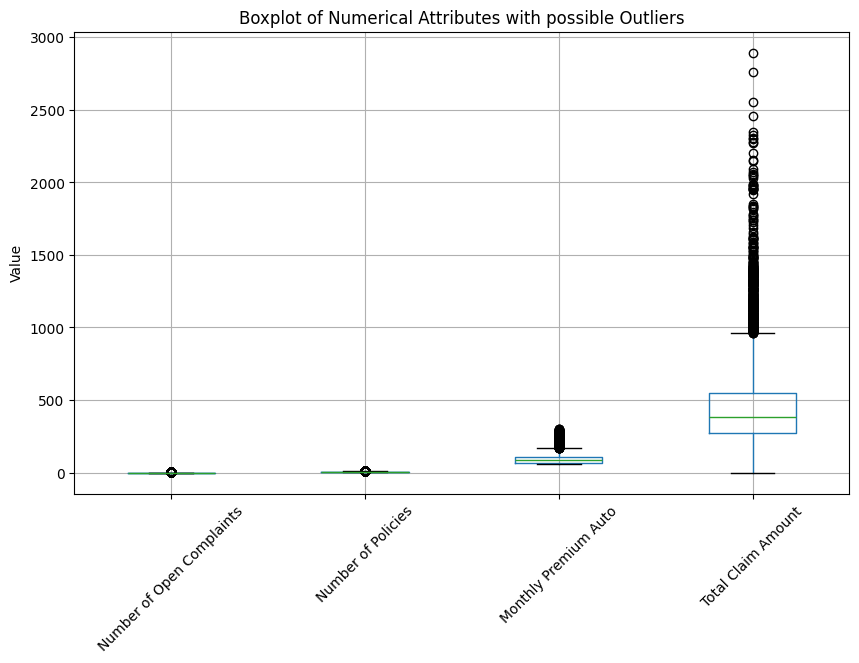

In [12]:
outlier_col = [ 'Number of Open Complaints', 'Number of Policies','Monthly Premium Auto', 'Total Claim Amount']
plt.figure(figsize=(10, 6))
df[outlier_col].boxplot()
plt.title('Boxplot of Numerical Attributes with possible Outliers')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.show()

## Exploratory Data Analysis(EDA)

In [13]:
df_categorical = df.select_dtypes(include=['object'])
df_numerical =  df.select_dtypes(include=['number'])

In [14]:
df_categorical.describe().T

,count,unique,top,freq
Customer,9134,9134,BU79786,1
State,9134,5,California,3150
Response,9134,2,No,7826
Coverage,9134,3,Basic,5568
Education,9134,5,Bachelor,2748
EmploymentStatus,9134,5,Employed,5698
Gender,9134,2,F,4658
Location Code,9134,3,Suburban,5779
Marital Status,9134,3,Married,5298
Policy Type,9134,3,Personal Auto,6788


In [15]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [16]:
max(df['Customer Lifetime Value'])

83325.38119

In [17]:
df_categorical['State'].value_counts()

State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

Analyzing customers who respond to marketing offers

In [18]:
temp = df_categorical[df_categorical['Response']=='Yes']

In [19]:
len(temp)

1308

In [20]:
temp.groupby('State')['Response'].count()

State
Arizona       243
California    456
Nevada        124
Oregon        376
Washington    109
Name: Response, dtype: int64

<Axes: >

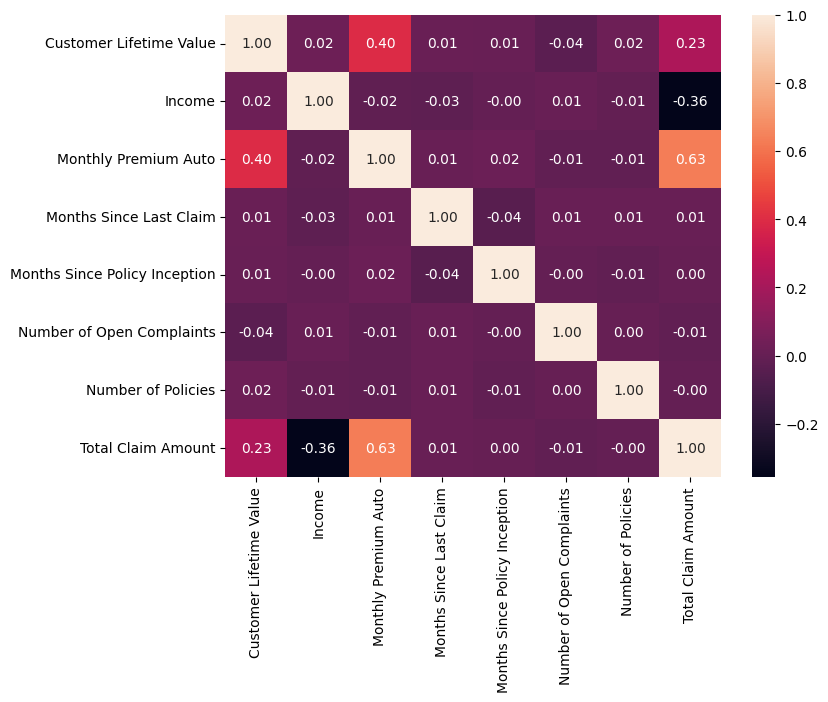

In [21]:
corr_matrix = df_numerical.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f')

<Axes: >

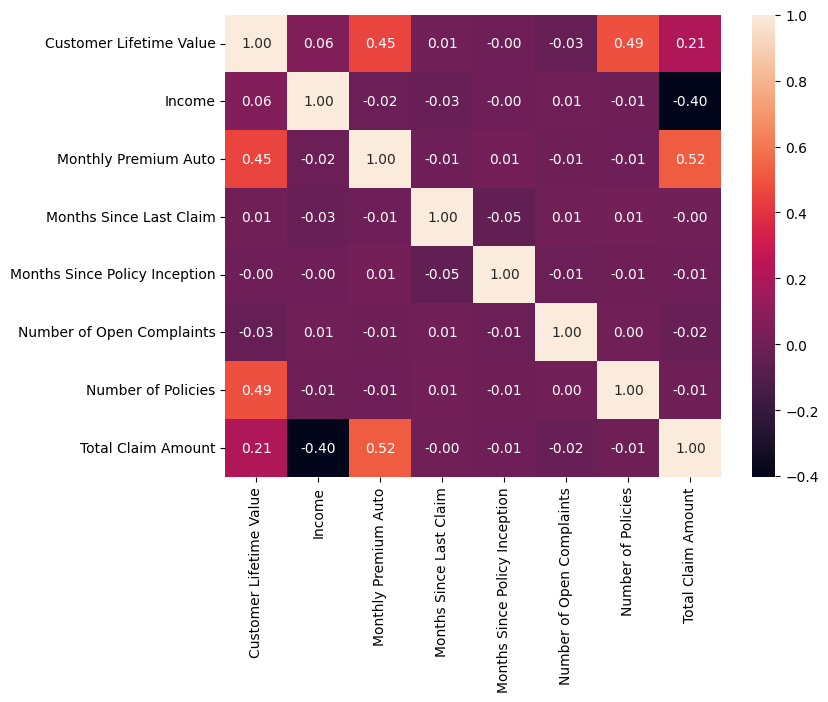

In [22]:
spearm_corr_matrix = df_numerical.corr(method = 'spearman')
plt.figure(figsize = (8,6))
sns.heatmap(spearm_corr_matrix, annot = True, fmt = '.2f')

Monthly auto premium and Total claim amount have highest correlation

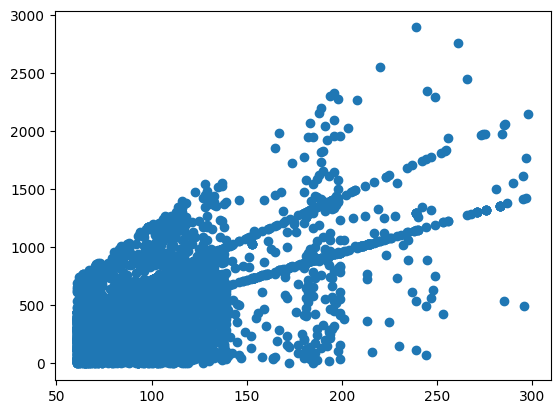

In [23]:
plt.scatter(df['Monthly Premium Auto'],df['Total Claim Amount'])

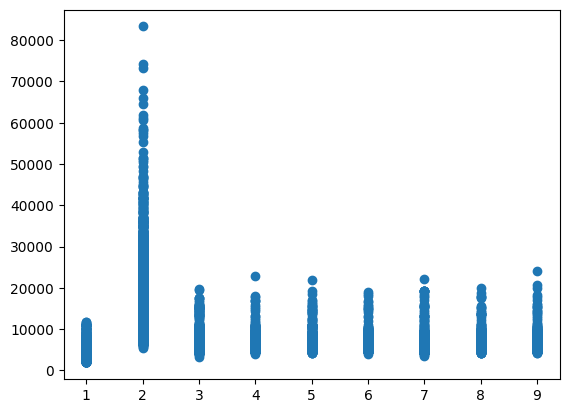

In [24]:
plt.scatter(df['Number of Policies'],df['Customer Lifetime Value'])

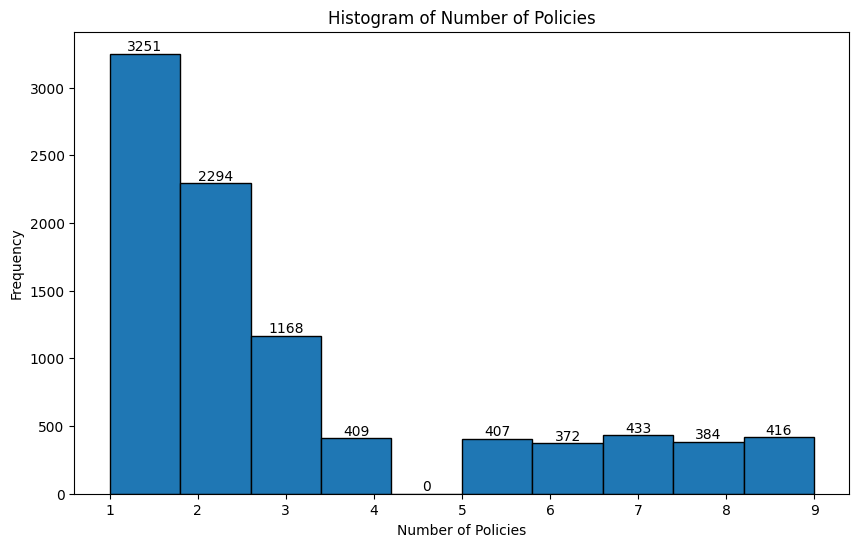

In [25]:

# Creating the histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['Number of Policies'], bins=10, edgecolor='black')

# Adding the count labels
for count, x in zip(n, bins):
    height = count
    plt.text(x + (bins[1] - bins[0]) / 2, height, f'{int(height)}', ha='center', va='bottom')

plt.xlabel('Number of Policies')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Policies')
plt.show()

### Probability Distribution

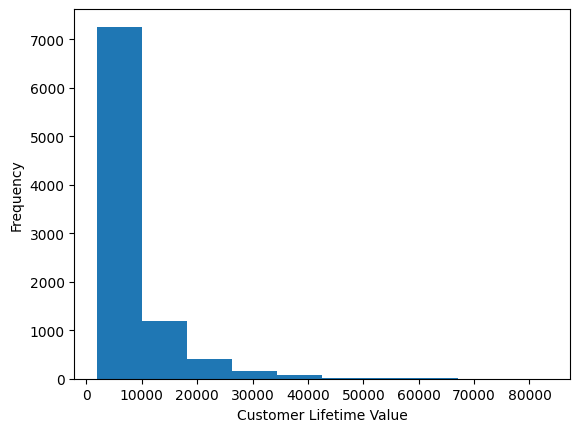

In [26]:
plt.hist(df['Customer Lifetime Value'])
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Frequency");

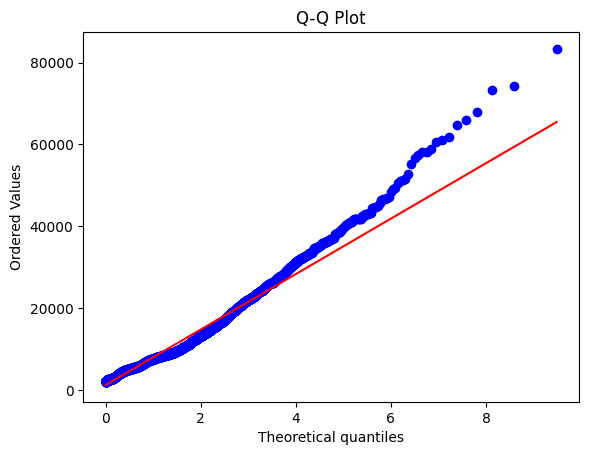

In [27]:
stats.probplot(df['Customer Lifetime Value'], plot = plt, dist='expon');
plt.title("Q-Q Plot");

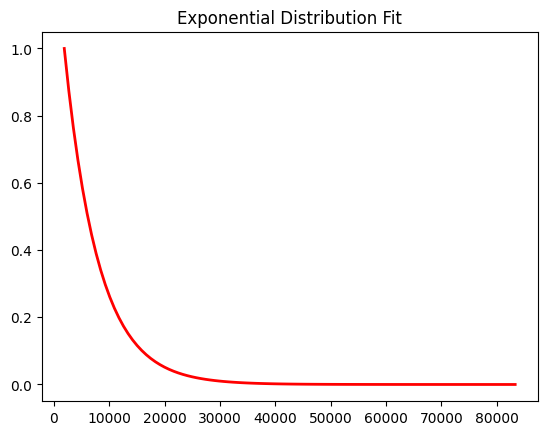

In [28]:
loc, scale = expon.fit(df['Customer Lifetime Value'])
x = np.linspace(min(df['Customer Lifetime Value']), max(df['Customer Lifetime Value']), 100)
plt.plot(x, scale*expon.pdf(x, loc=loc, scale=scale), 'r-', lw=2, label='Exponential distribution fit')
plt.title("Exponential Distribution Fit");

In [29]:
loc

1898.007675

### Hypothesis Testing

Null Hypothesis : The data is Normally distibuted

Alternate Hypothesis : the data is not normally distributed


In [30]:
stats.shapiro(df['Customer Lifetime Value'])

c:\Users\HP\Documents\CLV\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9134.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.7033723183514178, pvalue=4.0169007188037684e-83)

**Identifying the test**

1. ANOVA
2. TTEST/Manwhiteneyy

In [31]:
# Initialize lists to store column names for ANOVA and Mann-Whitney U test
columns_anova = []
columns_mannwhitney = []

# Iterate through categorical columns in the DataFrame
for column in df_categorical:
    # Check if the column has more than 2 unique values for ANOVA
    if df[column].nunique() > 2:
        columns_anova.append(column)
    # Otherwise, consider it for Mann-Whitney U test
    else:
        columns_mannwhitney.append(column)

# Print the lists of columns for ANOVA and Mann-Whitney U test
print("Columns for ANOVA test:", columns_anova)
print("Columns for Mann-Whitney U test:", columns_mannwhitney)

Columns for ANOVA test: ['Customer', 'State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']
Columns for Mann-Whitney U test: ['Response', 'Gender']


**Testing for Response Column**

**Null Hypothesis:** There is no significant difference in the distributions of both populations.

**Alternative Hypothesis:** There is a significant difference in the distributions of both populations.

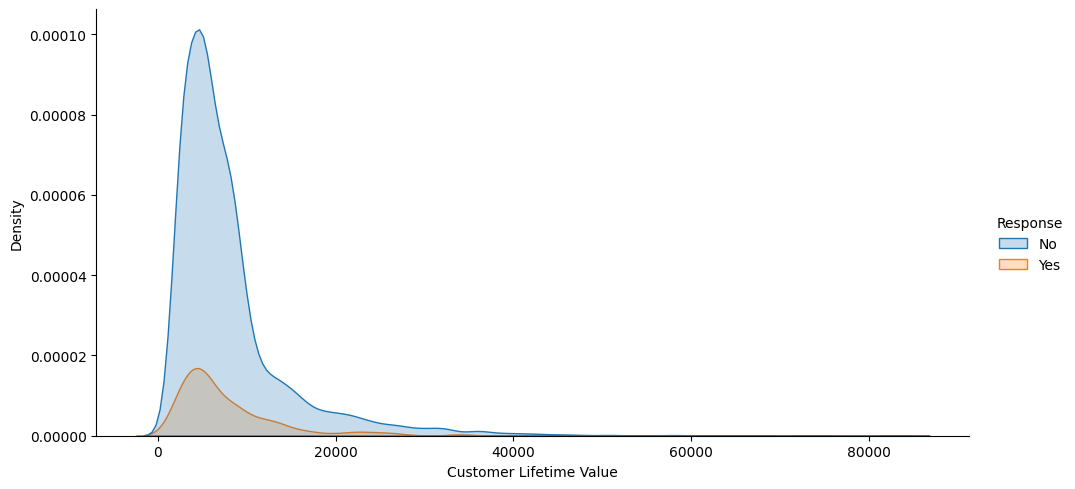

In [32]:
import seaborn as sns

# Create a kernel density estimate (KDE) plot using seaborn with custom color palette
sns.displot(
    data=df,
    x='Customer Lifetime Value',
    hue='Response',
    kind='kde',
    height=5,
    aspect=2,
    fill=True,
)

In [33]:
yes = df[df['Response']=='Yes']['Customer Lifetime Value']
no = df[df['Response']=='No']['Customer Lifetime Value']

In [34]:
mannwhitneyu_test_result = stats.mannwhitneyu(yes,no)
print(mannwhitneyu_test_result)

MannwhitneyuResult(statistic=5060988.0, pvalue=0.5168872245291198)


**Gender column:**

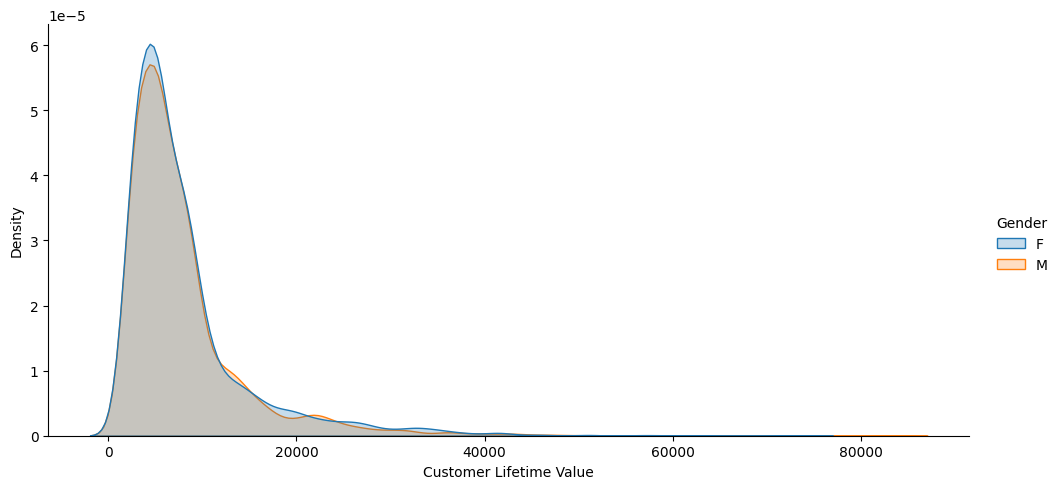

In [35]:
sns.displot(
    data=df,
    x='Customer Lifetime Value',
    hue='Gender',
    kind='kde',
    height=5,
    aspect=2,
    fill=True,
)

male = df[df['Gender']=='M']['Customer Lifetime Value']
female = df[df['Gender']=='F']['Customer Lifetime Value']

In [36]:

Gender_test_result = stats.mannwhitneyu(male,female)
print(Gender_test_result)

MannwhitneyuResult(statistic=10337134.0, pvalue=0.48749303056449833)


**State column:**

**Null Hypothesis:** The groups have the same mean Ranks.

**Alternative Hypothesis:** The groups do not have the same mean Ranks.

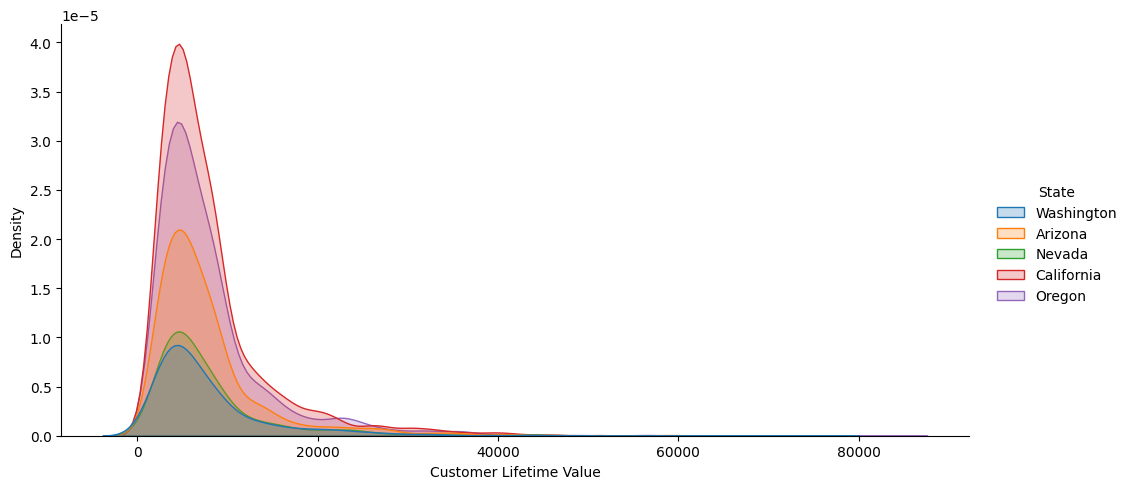

In [37]:
sns.displot(
    data=df,
    x='Customer Lifetime Value',
    hue='State',
    kind='kde',
    height=5,
    aspect=2,
    fill=True,
)

In [38]:
Or=df[df['State'] == 'Oregon']['Customer Lifetime Value']
ca=df[df['State'] == 'California']['Customer Lifetime Value']
ne=df[df['State'] == 'Nevada']['Customer Lifetime Value']
ar=df[df['State'] == 'Arizona']['Customer Lifetime Value']
wa=df[df['State'] == 'Washington']['Customer Lifetime Value']

In [39]:
state = stats.kruskal(Or, ca, ar, ne,wa)
state


KruskalResult(statistic=5.072069583836472, pvalue=0.27998232358818953)

In [40]:
anova_state = stats.f_oneway(Or, ca, ar, ne,wa)
anova_state

F_onewayResult(statistic=0.27289285462119306, pvalue=0.8955985932127517)

**Coverage Column:**

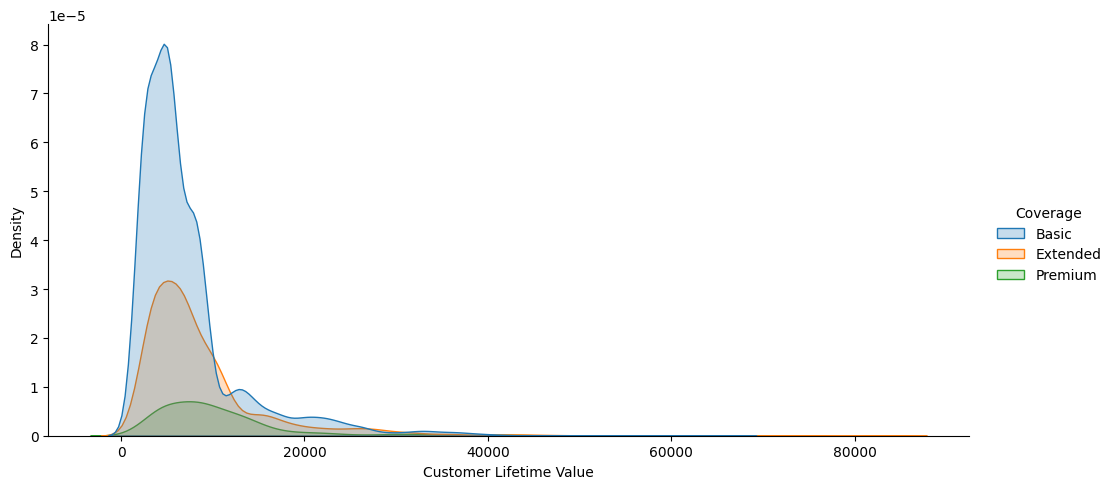

In [41]:
sns.displot(
    data=df,
    x='Customer Lifetime Value',
    hue='Coverage',
    kind='kde',
    height=5,
    aspect=2,
    fill=True,
)

In [42]:
ba=df[df['Coverage'] == 'Basic']['Customer Lifetime Value']
ex=df[df['Coverage'] == 'Extended']['Customer Lifetime Value']
pr = df[df['Coverage']=='Premium']['Customer Lifetime Value']

In [43]:
coverate_test_result = stats.kruskal(ba,ex,pr)
coverate_test_result

KruskalResult(statistic=502.4996090762843, pvalue=7.648852917746348e-110)

In [44]:
coverate_test = stats.f_oneway(ba,ex,pr)
coverate_test

F_onewayResult(statistic=133.67511419504905, pvalue=6.0158970099807e-58)

**Education Column:**

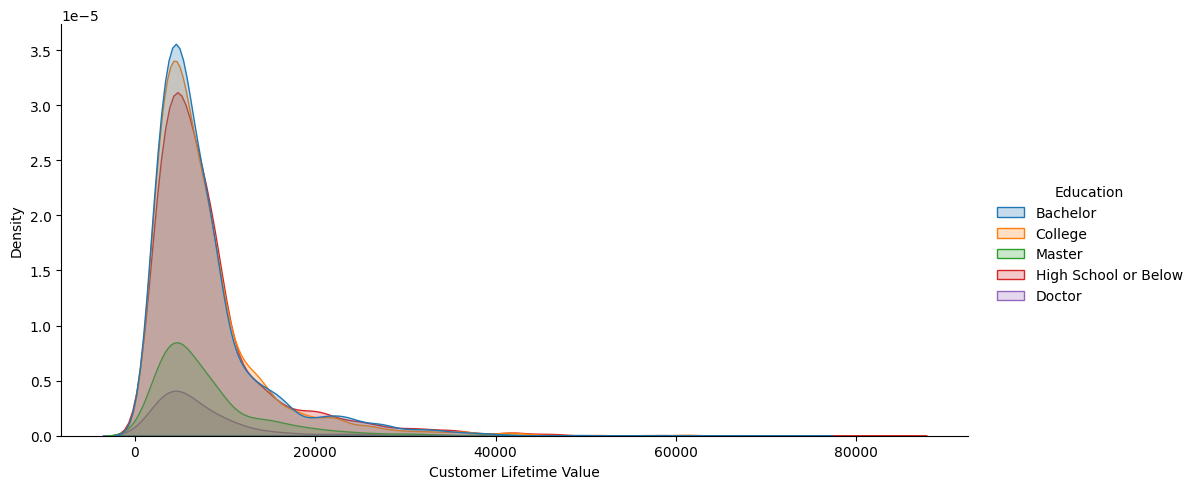

In [45]:
sns.displot(
    data=df,
    x='Customer Lifetime Value',
    hue='Education',
    kind='kde',
    height=5,
    aspect=2,
    fill=True,
)

In [46]:
Bachelor=df[df['Education'] == 'Bachelor']['Customer Lifetime Value']
College=df[df['Education'] == 'College']['Customer Lifetime Value']
Master=df[df['Education'] == 'Master']['Customer Lifetime Value']
HighSchool=df[df['Education'] == 'High School or Below']['Customer Lifetime Value']
Doctor =df[df['Education'] == 'Doctor']['Customer Lifetime Value']

In [47]:
education_test_result = stats.kruskal(Bachelor,College,Master,HighSchool,Doctor)
education_test_result

KruskalResult(statistic=12.234061758188824, pvalue=0.015693004298603028)

### Target variable Analysis

In [48]:
Target = df['Customer Lifetime Value']
Target.describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

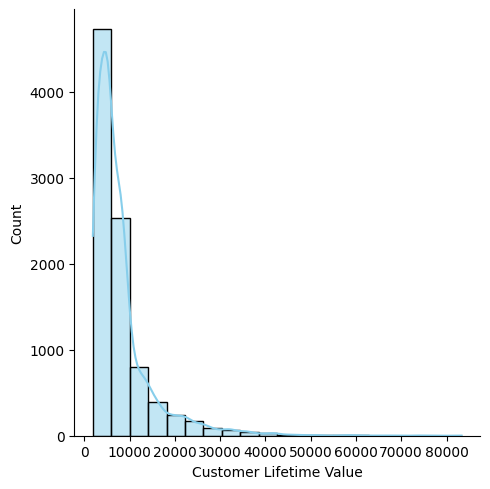

In [49]:
sns.displot(data=df, x="Customer Lifetime Value", kde=True, color="skyblue", bins=20)

<Axes: xlabel='Customer Lifetime Value'>

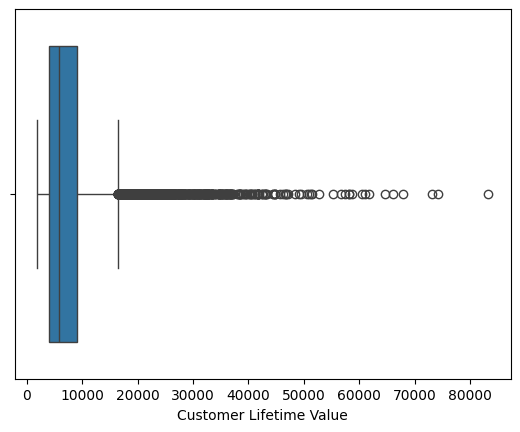

In [50]:

sns.boxplot(data= df, x="Customer Lifetime Value")

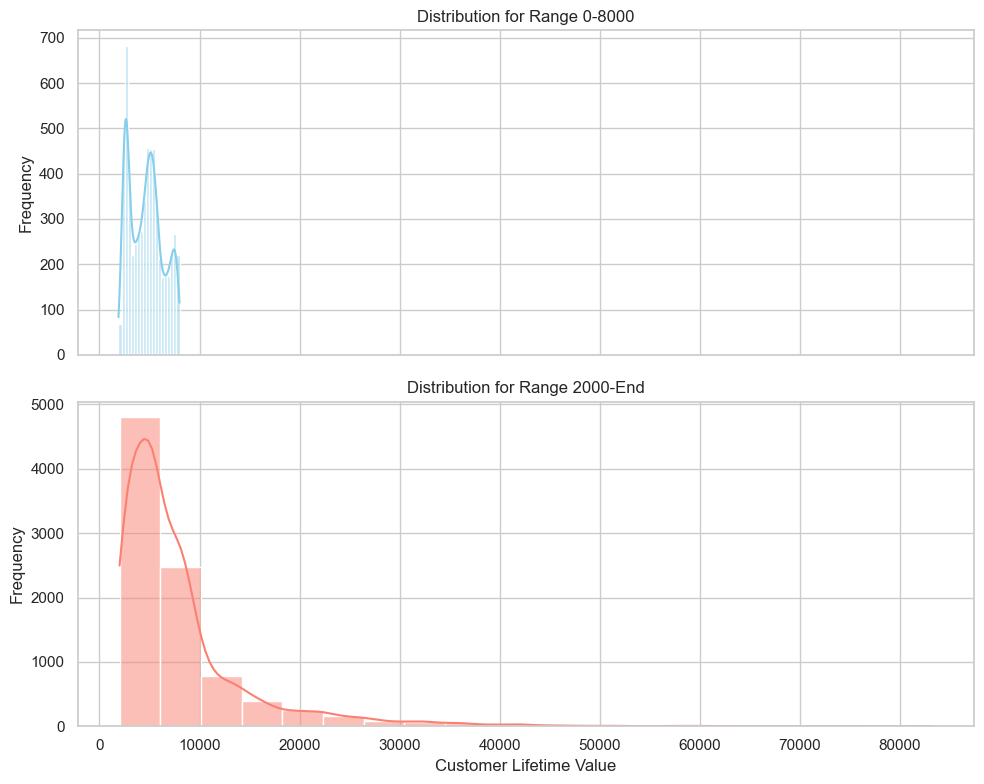

In [51]:
# Finding the distribution within two different ranges of the Customer Lifetime Value
sns.set(style="whitegrid")

# Define the ranges
range_1 = (0, 8000)
range_2_start = 2000

# Create subsets for each range
subset_1 = df[(df['Customer Lifetime Value'] >= range_1[0]) & (df['Customer Lifetime Value'] <= range_1[1])]
subset_2 = df[df['Customer Lifetime Value'] >= range_2_start]

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot distribution for range 1
sns.histplot(data=subset_1, x="Customer Lifetime Value", kde=True, color="skyblue", bins=20, ax=axes[0])
axes[0].set_title(f"Distribution for Range {range_1[0]}-{range_1[1]}")
axes[0].set_xlabel("Customer Lifetime Value")
axes[0].set_ylabel("Frequency")

# Plot distribution for range 2
sns.histplot(data=subset_2, x="Customer Lifetime Value", kde=True, color="salmon", bins=20, ax=axes[1])
axes[1].set_title(f"Distribution for Range {range_2_start}-End")
axes[1].set_xlabel("Customer Lifetime Value")
axes[1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [53]:
numerical_columns = ['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
           'Months Since Policy Inception', 'Number of Open Complaints',
           'Number of Policies', 'Total Claim Amount']

In [54]:
# Calculate statistics for each column
statistics = df[numerical_columns].agg(['mean', 'var', 'std', 'skew']).transpose()

# Print the statistics in a tabular format
print("Statistics for specified columns:")
print(statistics.to_string())

Statistics for specified columns:
                                       mean           var           std      skew
Income                         37657.380009  9.229386e+08  30379.904734  0.286887
Monthly Premium Auto              93.219291  1.183908e+03     34.407967  2.123546
Months Since Last Claim           15.097000  1.014705e+02     10.073257  0.278586
Months Since Policy Inception     48.064594  7.787443e+02     27.905991  0.040165
Number of Open Complaints          0.384388  8.287982e-01      0.910384  2.783263
Number of Policies                 2.966170  5.712969e+00      2.390182  1.253333
Total Claim Amount               434.088794  8.439030e+04    290.500092  1.714966


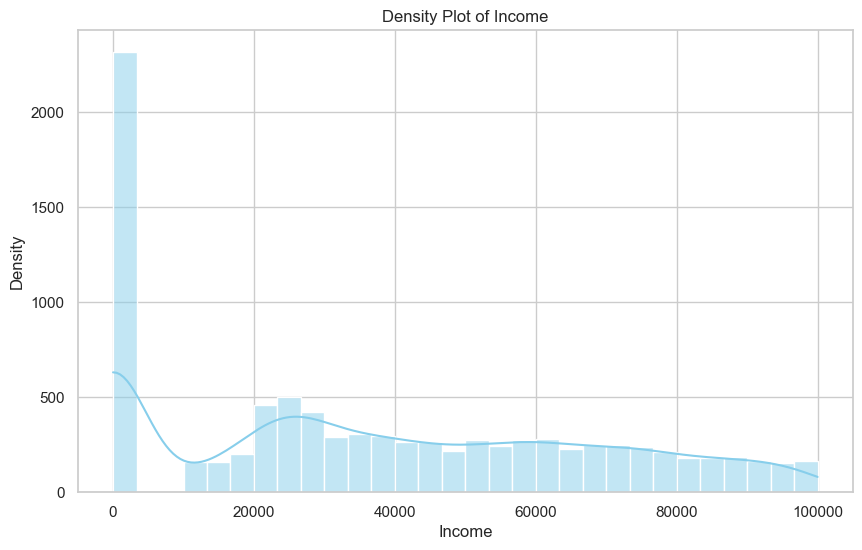

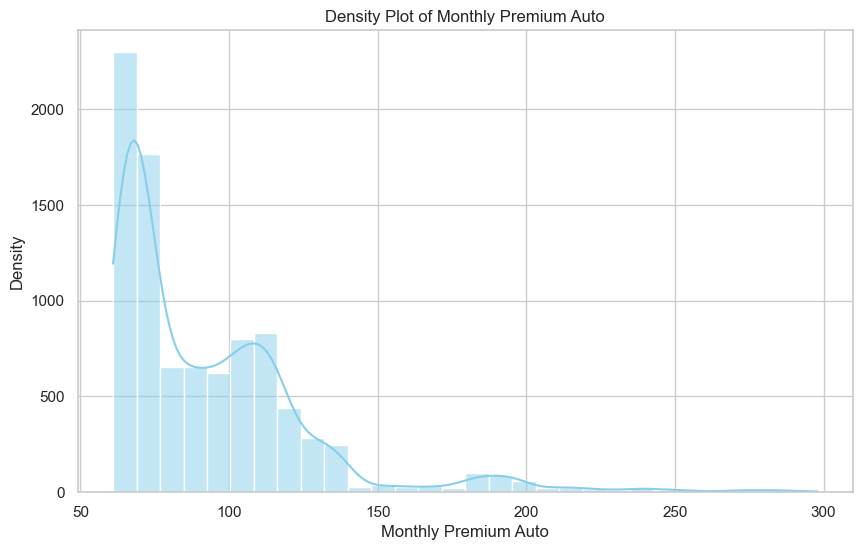

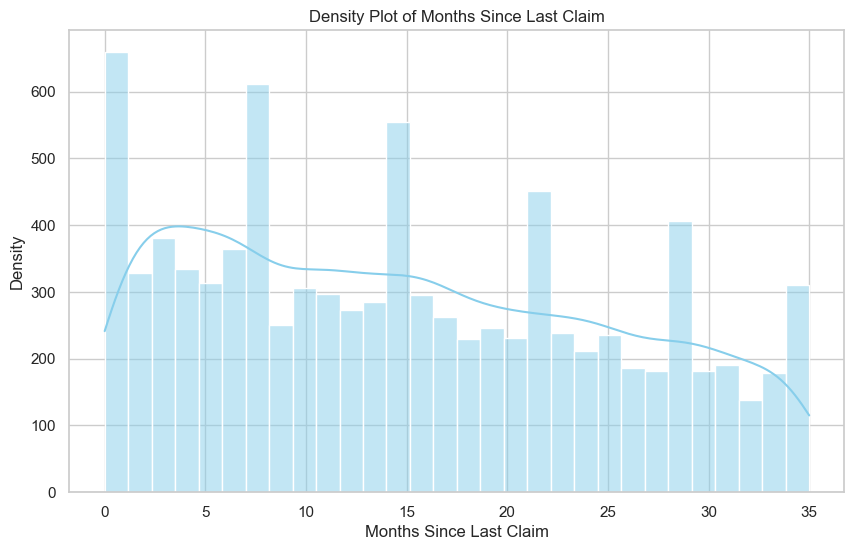

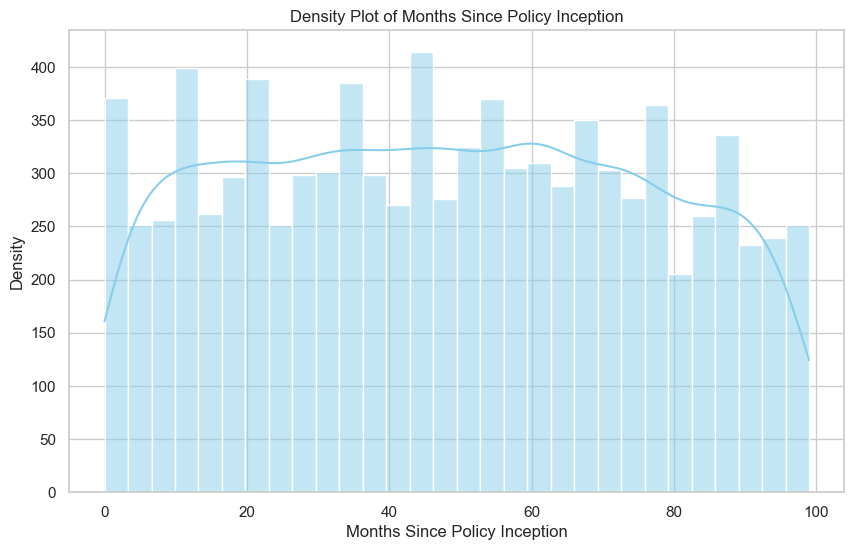

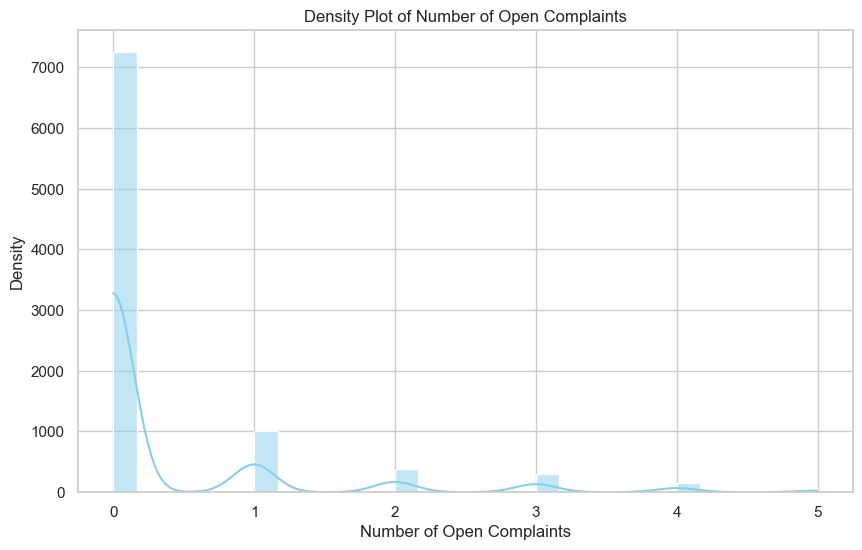

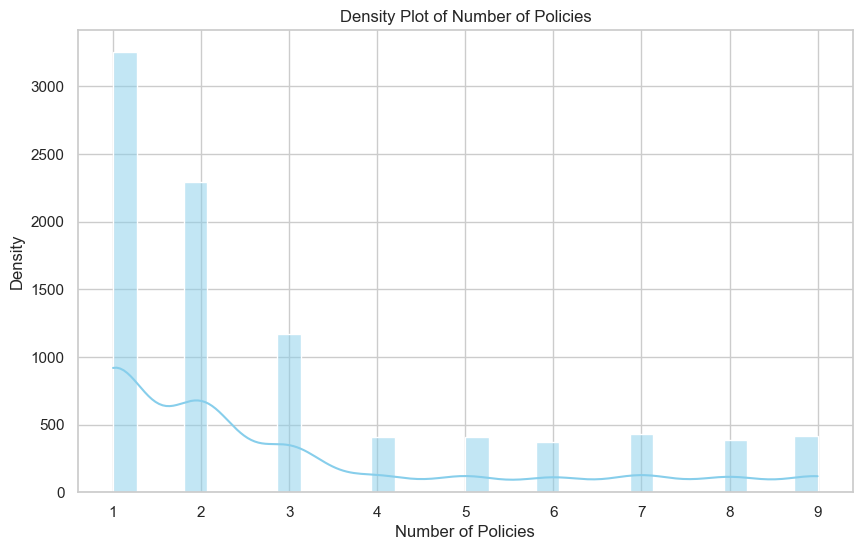

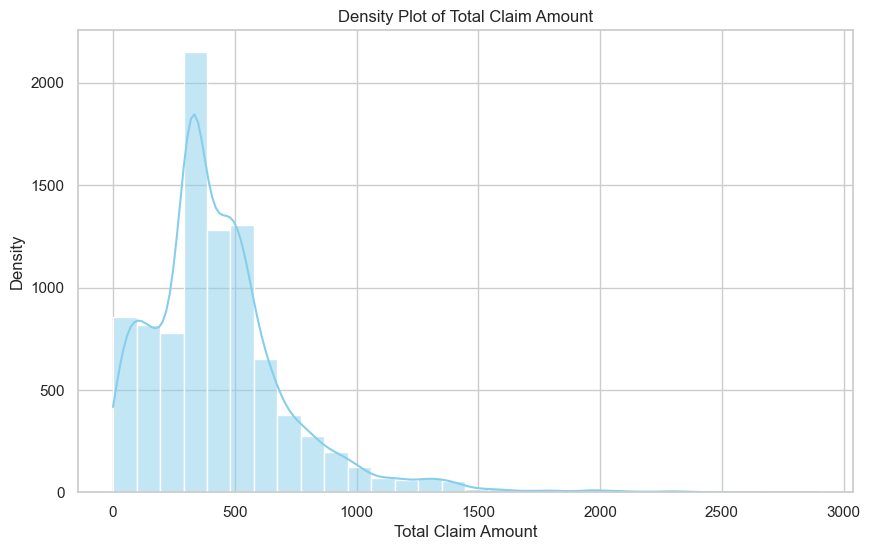

In [55]:
sns.set(style="whitegrid", palette="pastel")

# Iterate over each numerical column and create a density plot and histogram
for column in numerical_columns:
    plt.figure(figsize=(10, 6))

    # Density plot
    sns.histplot(df[column], kde=True, color='skyblue', bins=30)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

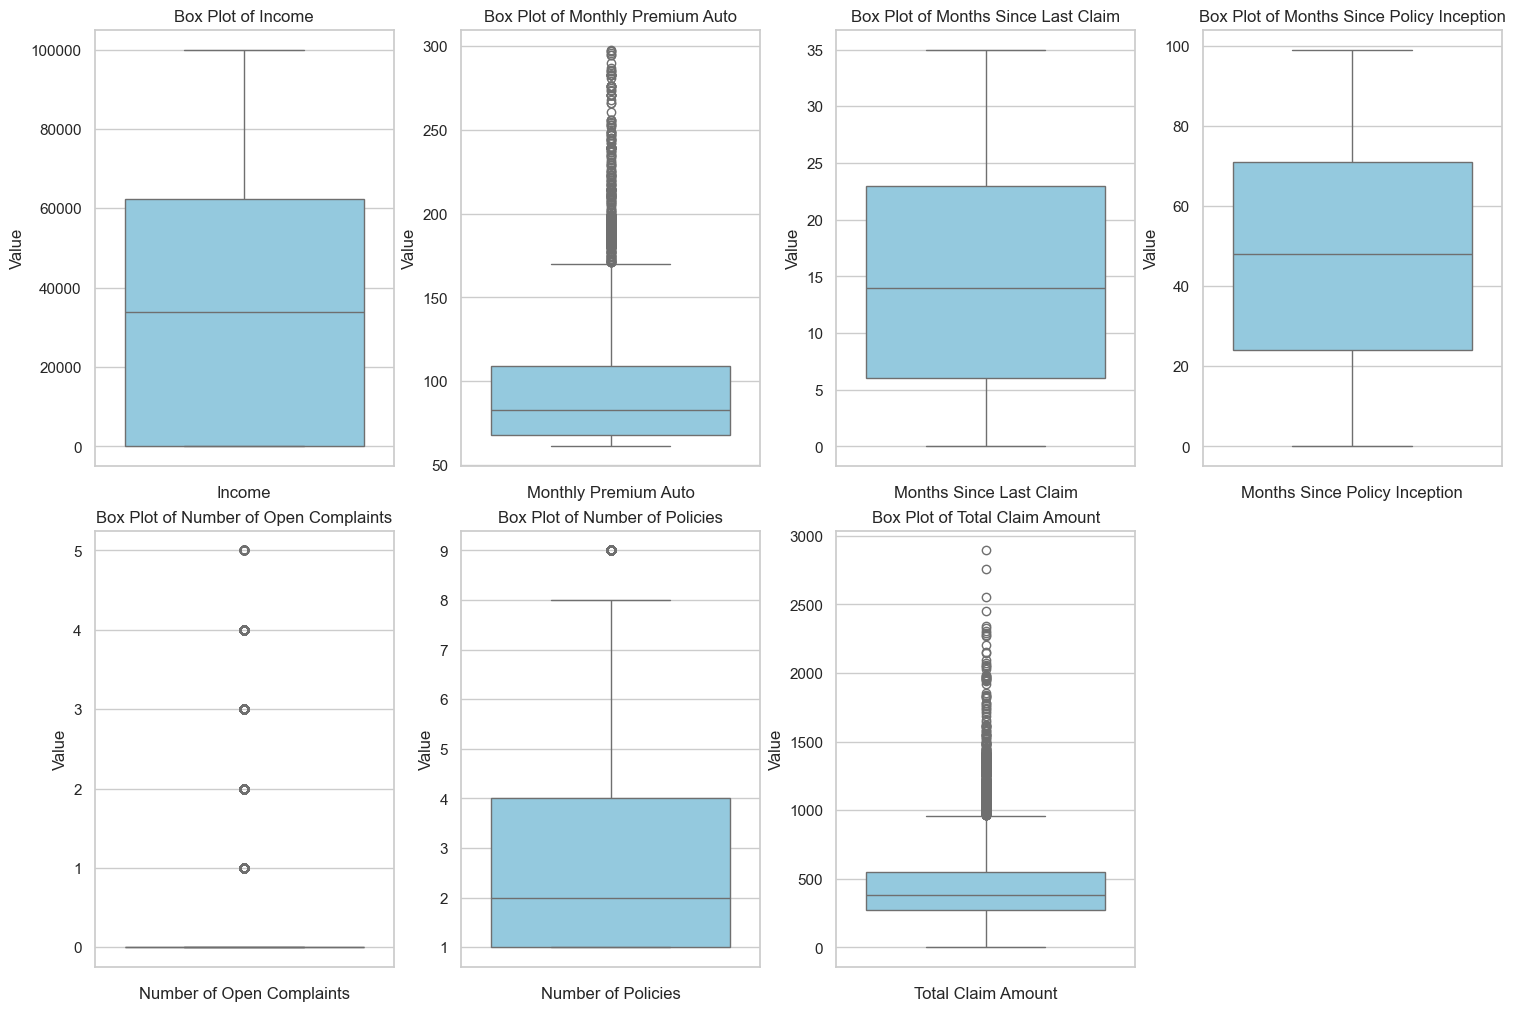

In [60]:
# Determine the number of rows and columns for the subplots
num_plots = len(numerical_columns)
nrows = 2
ncols = (num_plots + 1) // nrows  # Calculate the number of columns needed

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each numerical column and create a box plot in the subplot
for ax, column in zip(axes, numerical_columns):
    sns.boxplot(data=df[column], ax=ax, color='skyblue')
    ax.set_title(f'Box Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Value')

# Remove any unused axes if the number of plots is less than the grid size
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.show()

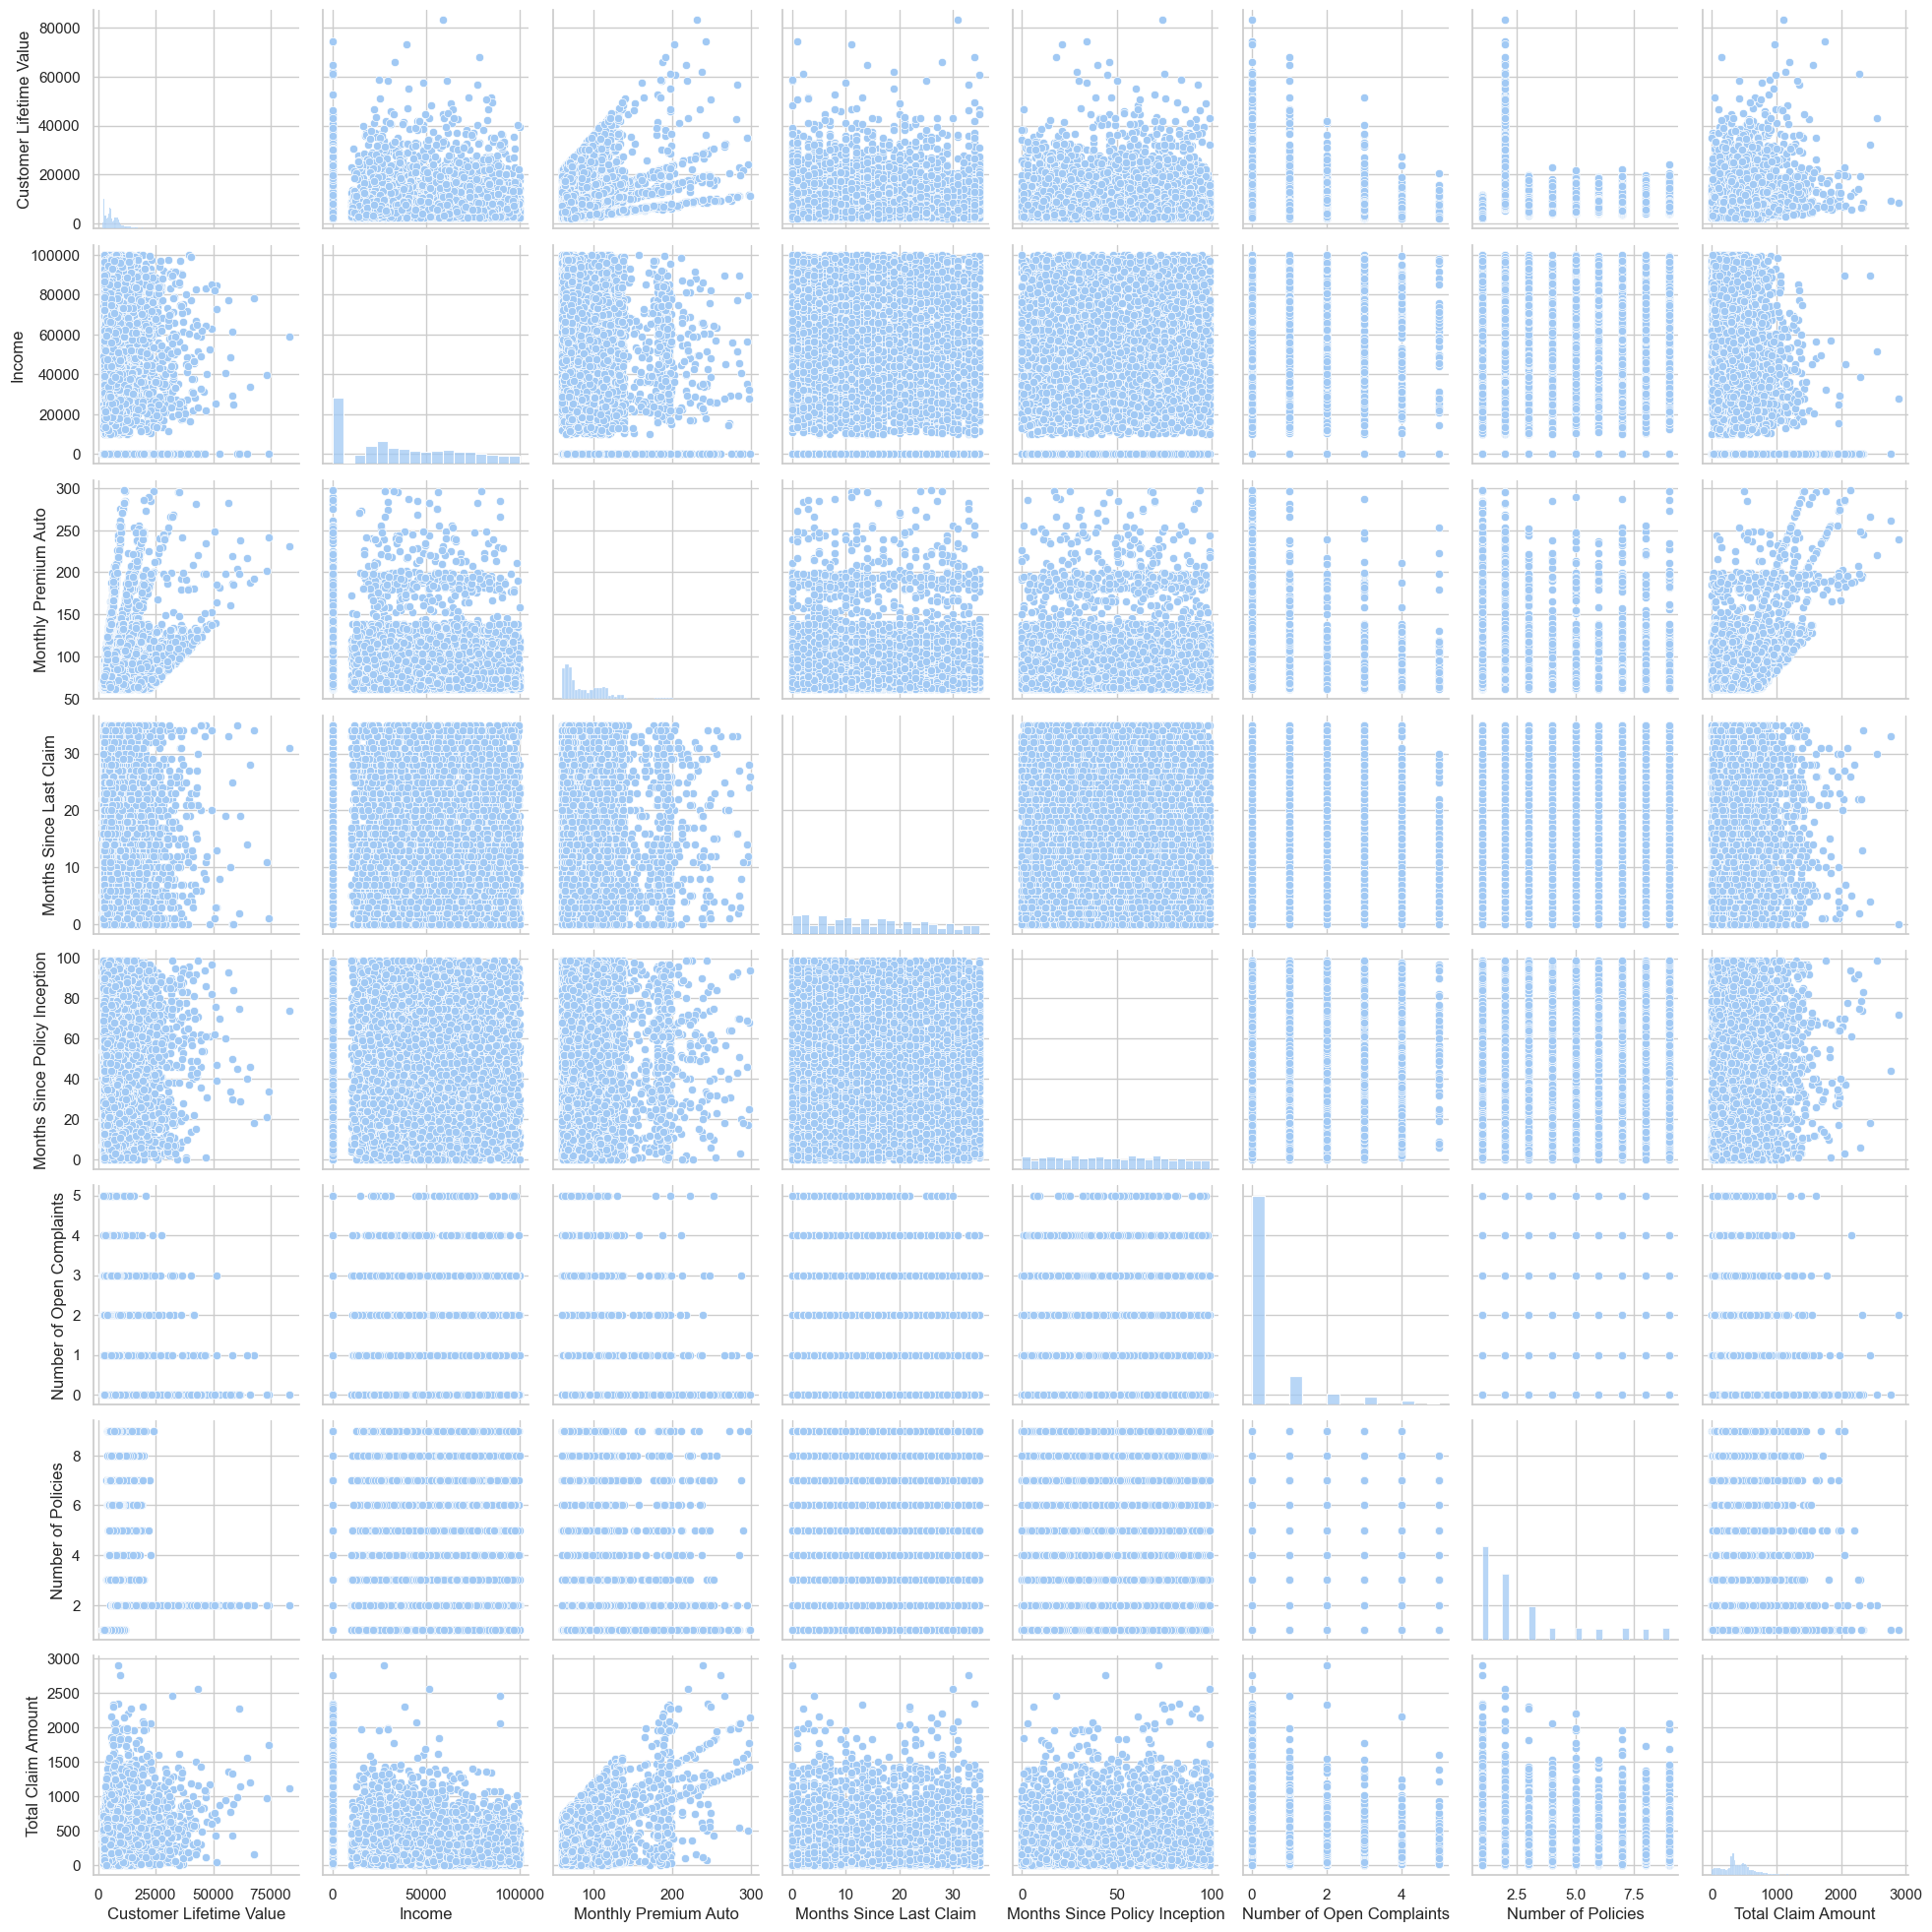

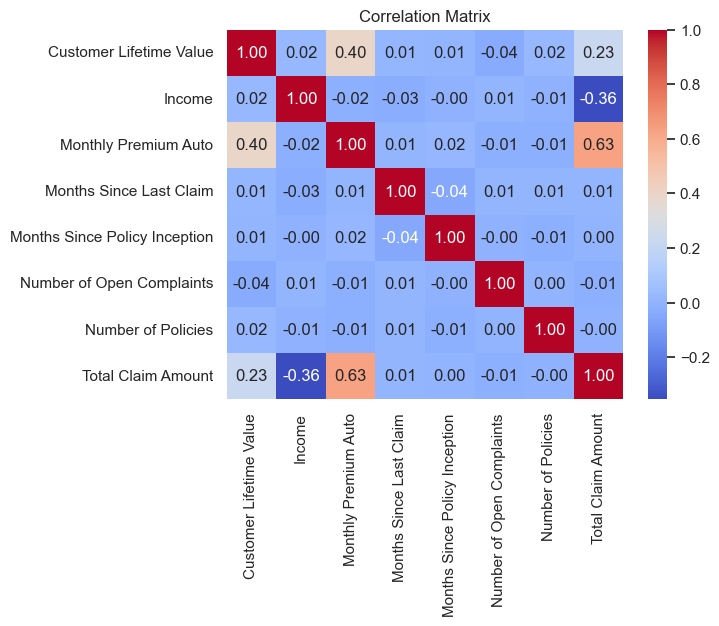

In [61]:
numerical = df.select_dtypes(include=['float64', 'int64']).columns

# Scatter plots for all pairs of numerical variables
sns.pairplot(df[numerical])
plt.show()

# Correlation matrix for all numerical columns
correlation_matrix = df[numerical].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [62]:
# Average months since last claim
avg_months_since_last_claim = df['Months Since Last Claim'].mean()
print(f"Average Months Since Last Claim: {avg_months_since_last_claim:.2f}")

Average Months Since Last Claim: 15.10


On average, customers tend to make claims within a certain timeframe, with the average months since the last claim representing the typical time elapsed between claims.

In [63]:
# Average months since policy inception
avg_months_since_policy_inception = df['Months Since Policy Inception'].mean()
print(f"Average Months Since Policy Inception: {avg_months_since_policy_inception:.2f}")

Average Months Since Policy Inception: 48.06


Customers have been with the insurance company for an average duration since policy inception. This metric helps understand the average tenure of customers and their loyalty to the company.

In [64]:
# Frequency of open complaints
open_complaints_frequency = df['Number of Open Complaints'].value_counts()
print("Frequency of Open Complaints:")
print(open_complaints_frequency)

Frequency of Open Complaints:
Number of Open Complaints
0    7252
1    1011
2     374
3     292
4     149
5      56
Name: count, dtype: int64


The frequency distribution of open complaints among customers reveals the prevalence of different complaint counts. This information is crucial for assessing customer satisfaction and identifying potential areas for improvement in service quality

In [65]:
# Average number of policies per customer
avg_policies_per_customer = df['Number of Policies'].mean()
print(f"Average Number of Policies per Customer: {avg_policies_per_customer:.2f}")

Average Number of Policies per Customer: 2.97


On average, customers hold a certain number of insurance policies, indicating the level of engagement and coverage preferences among the customer base.

In [66]:
# Highest number of policies

print("Number of Policies:\n",df['Number of Policies'].value_counts())

Number of Policies:
 Number of Policies
1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: count, dtype: int64
